
The final selected model will predict which movie titles will be successful. In other words, titles that are most favorable to get high overall ratings and positive reviews based on the historical data of 300,000 movies that were scraped on IMDB. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Movies-IMDB-Partitionned.csv to Movies-IMDB-Partitionned.csv


In [ ]:
# Analyzing the movie historical data using Pandas library
# Naming the scraped movie dataset to MovieData_0
import pandas as pd

MovieData = pd.read_csv('Movies-IMDB-Partitionned.csv')
#MovieData_0 = pd.read_csv('/Users/hamidoumaiga/pythonProject/Movie Review Web Analytics/Movies--IMDB.csv')
print(MovieData.columns)

Index(['movieID', 'userRating', 'review', 'userID', 'url', 'movieName',
       'movieCertification', 'movieRuntime', 'movieGenre', 'movieOveralRating',
       'Action', 'Drama', 'Thriller', 'Crime', 'Adventure', 'Comedy',
       'Romance', 'Fantasy', 'Horror', 'Western', 'War', 'Mystery', 'History',
       'Family', 'Animation', 'Sport', 'Music', 'Biography', 'Musical',
       'Sci-Fi'],
      dtype='object')


Missing Values could occur when no information is provided for rows or columns of the IMBD movie dataset. Missing Data would be a problem for our model since it could lead to inaccurate predictions.

# **Data Exploration**

In [ ]:
#Looking for Missing values or Nulls
print(MovieData.isnull().sum())

movieID               0
userRating            0
review                0
userID                0
url                   0
movieName             0
movieCertification    0
movieRuntime          0
movieGenre            0
movieOveralRating     0
Action                0
Drama                 0
Thriller              0
Crime                 0
Adventure             0
Comedy                0
Romance               0
Fantasy               0
Horror                0
Western               0
War                   0
Mystery               0
History               0
Family                0
Animation             0
Sport                 0
Music                 0
Biography             0
Musical               0
Sci-Fi                0
dtype: int64


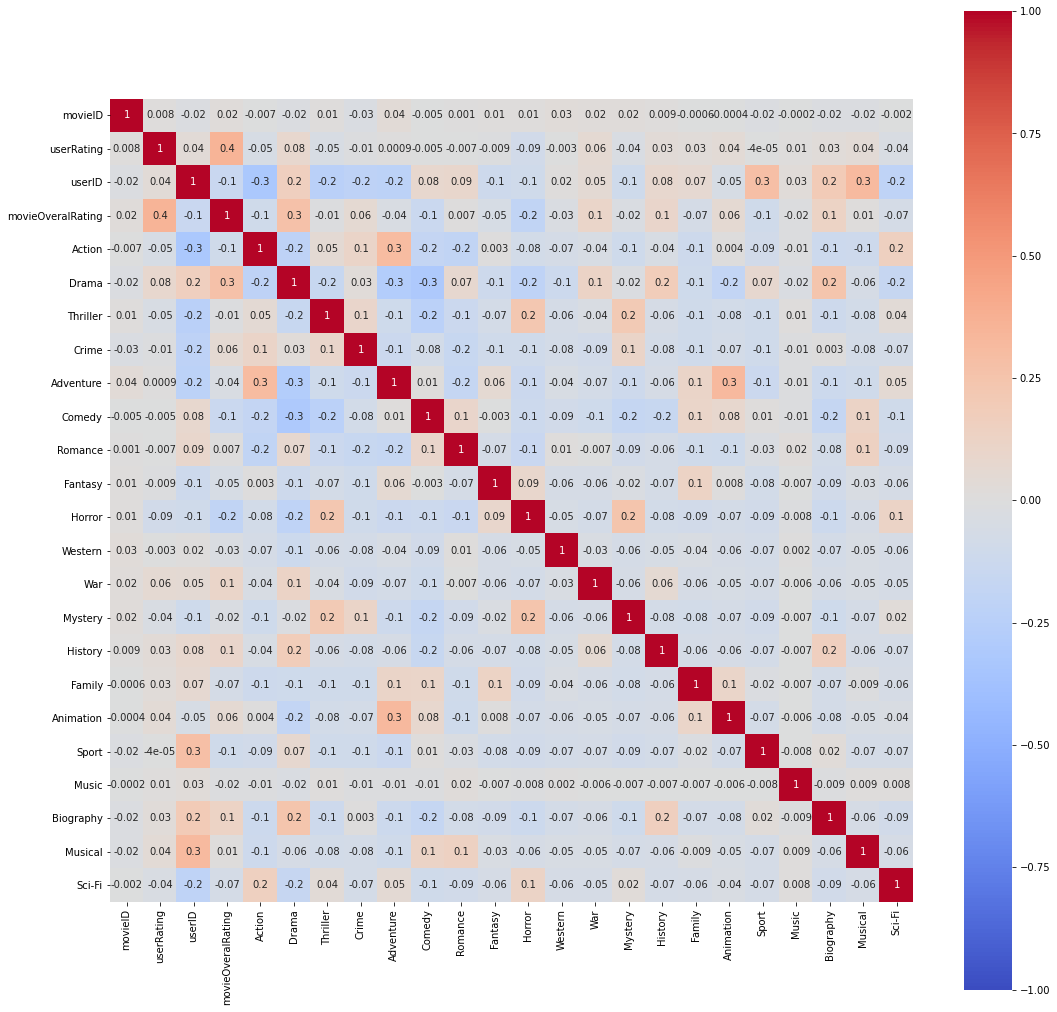

In [ ]:
# Heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18,18))
sns.heatmap(MovieData.corr(),
            annot=True,
            square=True,
            robust=True,
            fmt='.1g',
           center=0,
           vmin=-1,
           vmax=1,
           cmap='coolwarm')

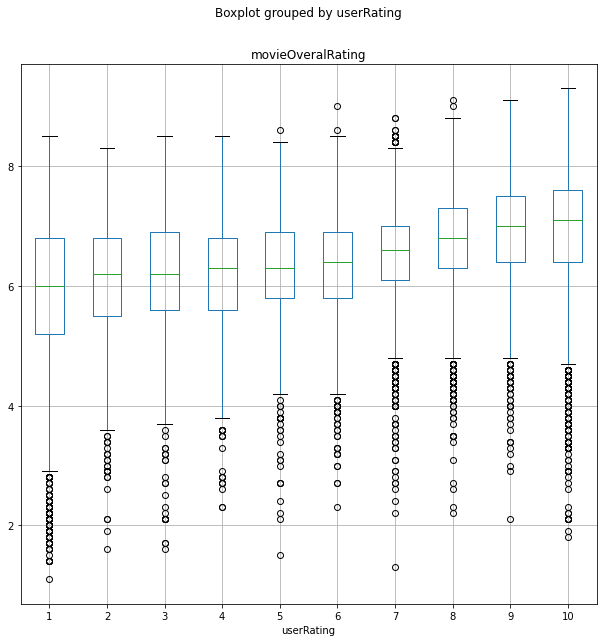

In [ ]:
# Scatter plotting the highest correlated variables

y_var  = 'movieOveralRating'
x_var = 'userRating'
MovieData.boxplot(column=y_var, by=x_var, figsize = (10,10))

The movie industry is a highly competitive market and the goal of this project is to recommend successful movie titles. I will define a movie title as successful when it has a rating above 8.
Recommending movies with a rating above 8.0 points out of 10 points would be considered a high-quality outcome, therefore i will focus this model on predicting the probability of a movie title achieving a rating above 8.0 rating points. 
Titles in this category would have a better chance of realizing a positive evaluation.

[6.7 4.9 6.4 7.3 8.1 6.9 4.6 6.5 6.3 7.4 4.3 6.1 7.6 4.4 6.8 7.8 5.1 6.2
 5.8 3.6 5.5 4.7 6.  8.  7.  5.3 8.4 7.1 7.2 6.6 7.5 5.9 7.9 7.7 4.5 8.2
 2.1 5.6 5.  5.4 3.8 8.8 4.8 3.9 5.2 9.  5.7 2.7 3.  8.5 1.9 3.1 2.6 8.3
 2.2 4.  8.9 8.7 3.7 4.2 3.3 1.1 3.5 3.4 2.5 1.7 8.6 2.3 1.8 2.4 1.3 4.1
 3.2 2.9 1.4 1.5 2.8 2.  9.3 9.1 1.6 9.2]


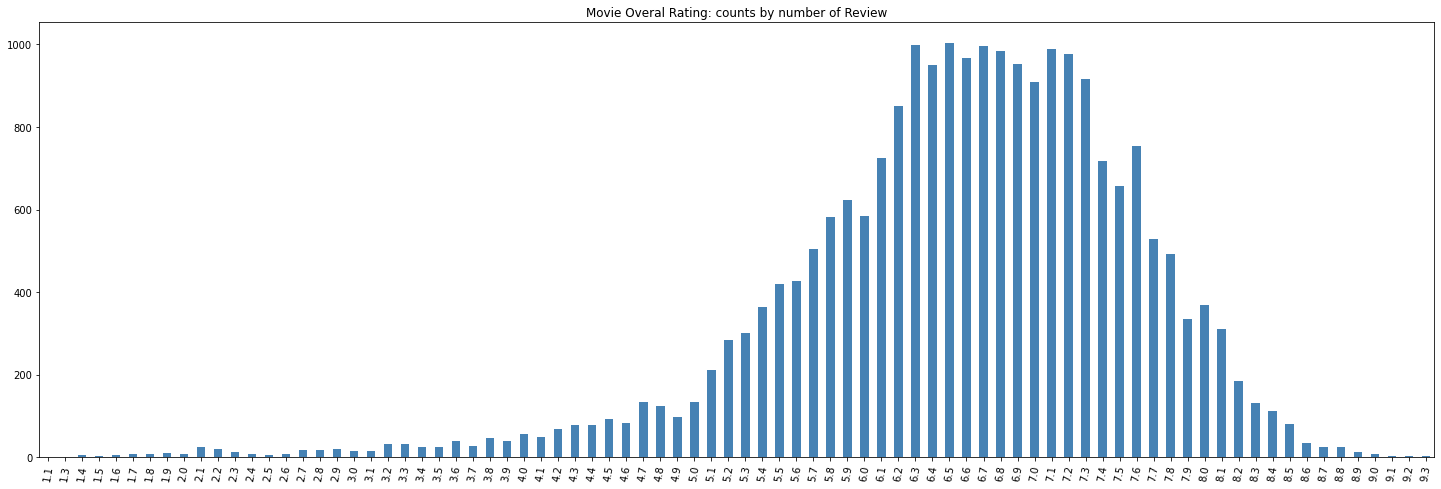

In [ ]:
# Checking dataset for unique overall rating 
print(MovieData['movieOveralRating'].unique())

ax = MovieData['movieOveralRating'].value_counts().sort_index().plot.bar(figsize=(25, 8), color="steelblue", rot=80)
ax.title.set_text('Movie Overal Rating: counts by number of Review')

[0 1]


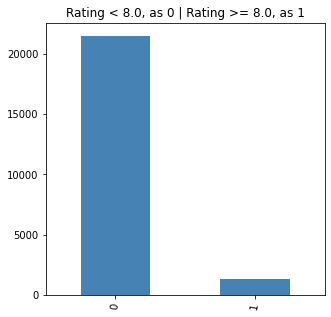

In [ ]:
# Defining Review Overall to 1 and 0 based on our objective:
# Our event of interest happens when a rating is greater than 8.0, coded as 1. 
# Else, our event of interest does not happen such that a rating is less than 8.0, coded as 0. 

MovieData1 = MovieData.copy()
MovieData1['movieOveralRating']= (MovieData['movieOveralRating'] >= 8.0).astype(int)

print(MovieData1['movieOveralRating'].unique())
ax = MovieData1['movieOveralRating'].value_counts().sort_index().plot.bar(figsize=(5, 5), color="steelblue", rot=80)
ax.title.set_text('Rating < 8.0, as 0 | Rating >= 8.0, as 1')

In [ ]:
MovieData1.columns

Index(['movieID', 'userRating', 'review', 'userID', 'url', 'movieName',
       'movieCertification', 'movieRuntime', 'movieGenre', 'movieOveralRating',
       'Action', 'Drama', 'Thriller', 'Crime', 'Adventure', 'Comedy',
       'Romance', 'Fantasy', 'Horror', 'Western', 'War', 'Mystery', 'History',
       'Family', 'Animation', 'Sport', 'Music', 'Biography', 'Musical',
       'Sci-Fi'],
      dtype='object')

In [ ]:
# Columns to Drop for now because they are not relevant in this predictions model
# Remove variable list = rvar_list

MovieData2 = MovieData1.copy()
rvar_list =['movieID', 'userRating', 'review', 'userID', 'url', 'movieCertification', 'movieRuntime']

MovieData3 = MovieData2.drop(columns=rvar_list)
print(MovieData3.columns)

Index(['movieName', 'movieGenre', 'movieOveralRating', 'Action', 'Drama',
       'Thriller', 'Crime', 'Adventure', 'Comedy', 'Romance', 'Fantasy',
       'Horror', 'Western', 'War', 'Mystery', 'History', 'Family', 'Animation',
       'Sport', 'Music', 'Biography', 'Musical', 'Sci-Fi'],
      dtype='object')


In [ ]:
# Variable Transformation

# Separating all the variables into lists for future column indexing
# One for numerical, the other for categorical 

MovieData4 = MovieData3.copy()
cvar_list = ['movieGenre', 'movieName', 'movieOveralRating']
MovieData4[cvar_list] = MovieData3[cvar_list].astype('category')


# Converting the categorical variables into dummies
MovieData5 = MovieData4.copy()
MovieData5 = pd.get_dummies(MovieData4, prefix_sep='_')

# Listing all the columns after dummy coding
list(MovieData5.columns)

['Action',
 'Drama',
 'Thriller',
 'Crime',
 'Adventure',
 'Comedy',
 'Romance',
 'Fantasy',
 'Horror',
 'Western',
 'War',
 'Mystery',
 'History',
 'Family',
 'Animation',
 'Sport',
 'Music',
 'Biography',
 'Musical',
 'Sci-Fi',
 'movieName_#Alive',
 "movieName_'71",
 "movieName_'Neath the Arizona Skies",
 "movieName_'Round Midnight",
 'movieName_(T)Raumschiff Surprise - Periode 1',
 'movieName_(Untitled)',
 'movieName_...All the Marbles',
 'movieName_1 Mile to You',
 'movieName_1,000 Times Good Night',
 'movieName_10 Cloverfield Lane',
 'movieName_10 Rillington Place',
 'movieName_10 Things I Hate About You',
 'movieName_10,000 BC',
 'movieName_100 Feet',
 'movieName_100 Meters',
 'movieName_100 Rifles',
 'movieName_101 Dalmatians',
 'movieName_102 Dalmatians',
 'movieName_11/11/11',
 'movieName_11:14',
 'movieName_12 Angry Men',
 'movieName_12 Monkeys',
 'movieName_12 Strong',
 'movieName_12 Years a Slave',
 'movieName_127 Hours',
 'movieName_13 Assassins',
 'movieName_13 Going on 3

My event of interest for the recommendation system is a title that was rated greater than 8.0, or [movieOveralRating_1]. I also have to remove User Rating that are less than 8.0 points.
After coding the categorical predictors, I will drop the dummies that corresponded to the most frequent value (in other words the mode value) of the categorical predictor in the movie dataset.

In [ ]:
# Removing the redundant dummies 
# Placeholder variable: rdummies

MovieData6 = MovieData5.copy()
rdummies = ['movieOveralRating_0']
MovieData6 = MovieData5.drop(columns=rdummies)

In [ ]:
# Part Data Partiton
MovieData7 = MovieData6.copy()

# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: model_selection. Required function name: train_test_split
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition. For our dataset we will use 30 percent for testing.
df4partition = MovieData7
testpart_size = 0.5

# random_state specifies the seed for random number generator. 
# random_state = 1
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

       Action  ...  movieOveralRating_1
5151        0  ...                    0
13417       1  ...                    0
5819        0  ...                    0
1570        1  ...                    0
5202        0  ...                    0
...       ...  ...                  ...
10955       0  ...                    0
17289       0  ...                    1
5192        1  ...                    0
12172       1  ...                    0
235         0  ...                    0

[11396 rows x 9395 columns]


In [ ]:
# Part Classification tree 
# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: tree 
# Required function name: DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'movieOveralRating_1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile

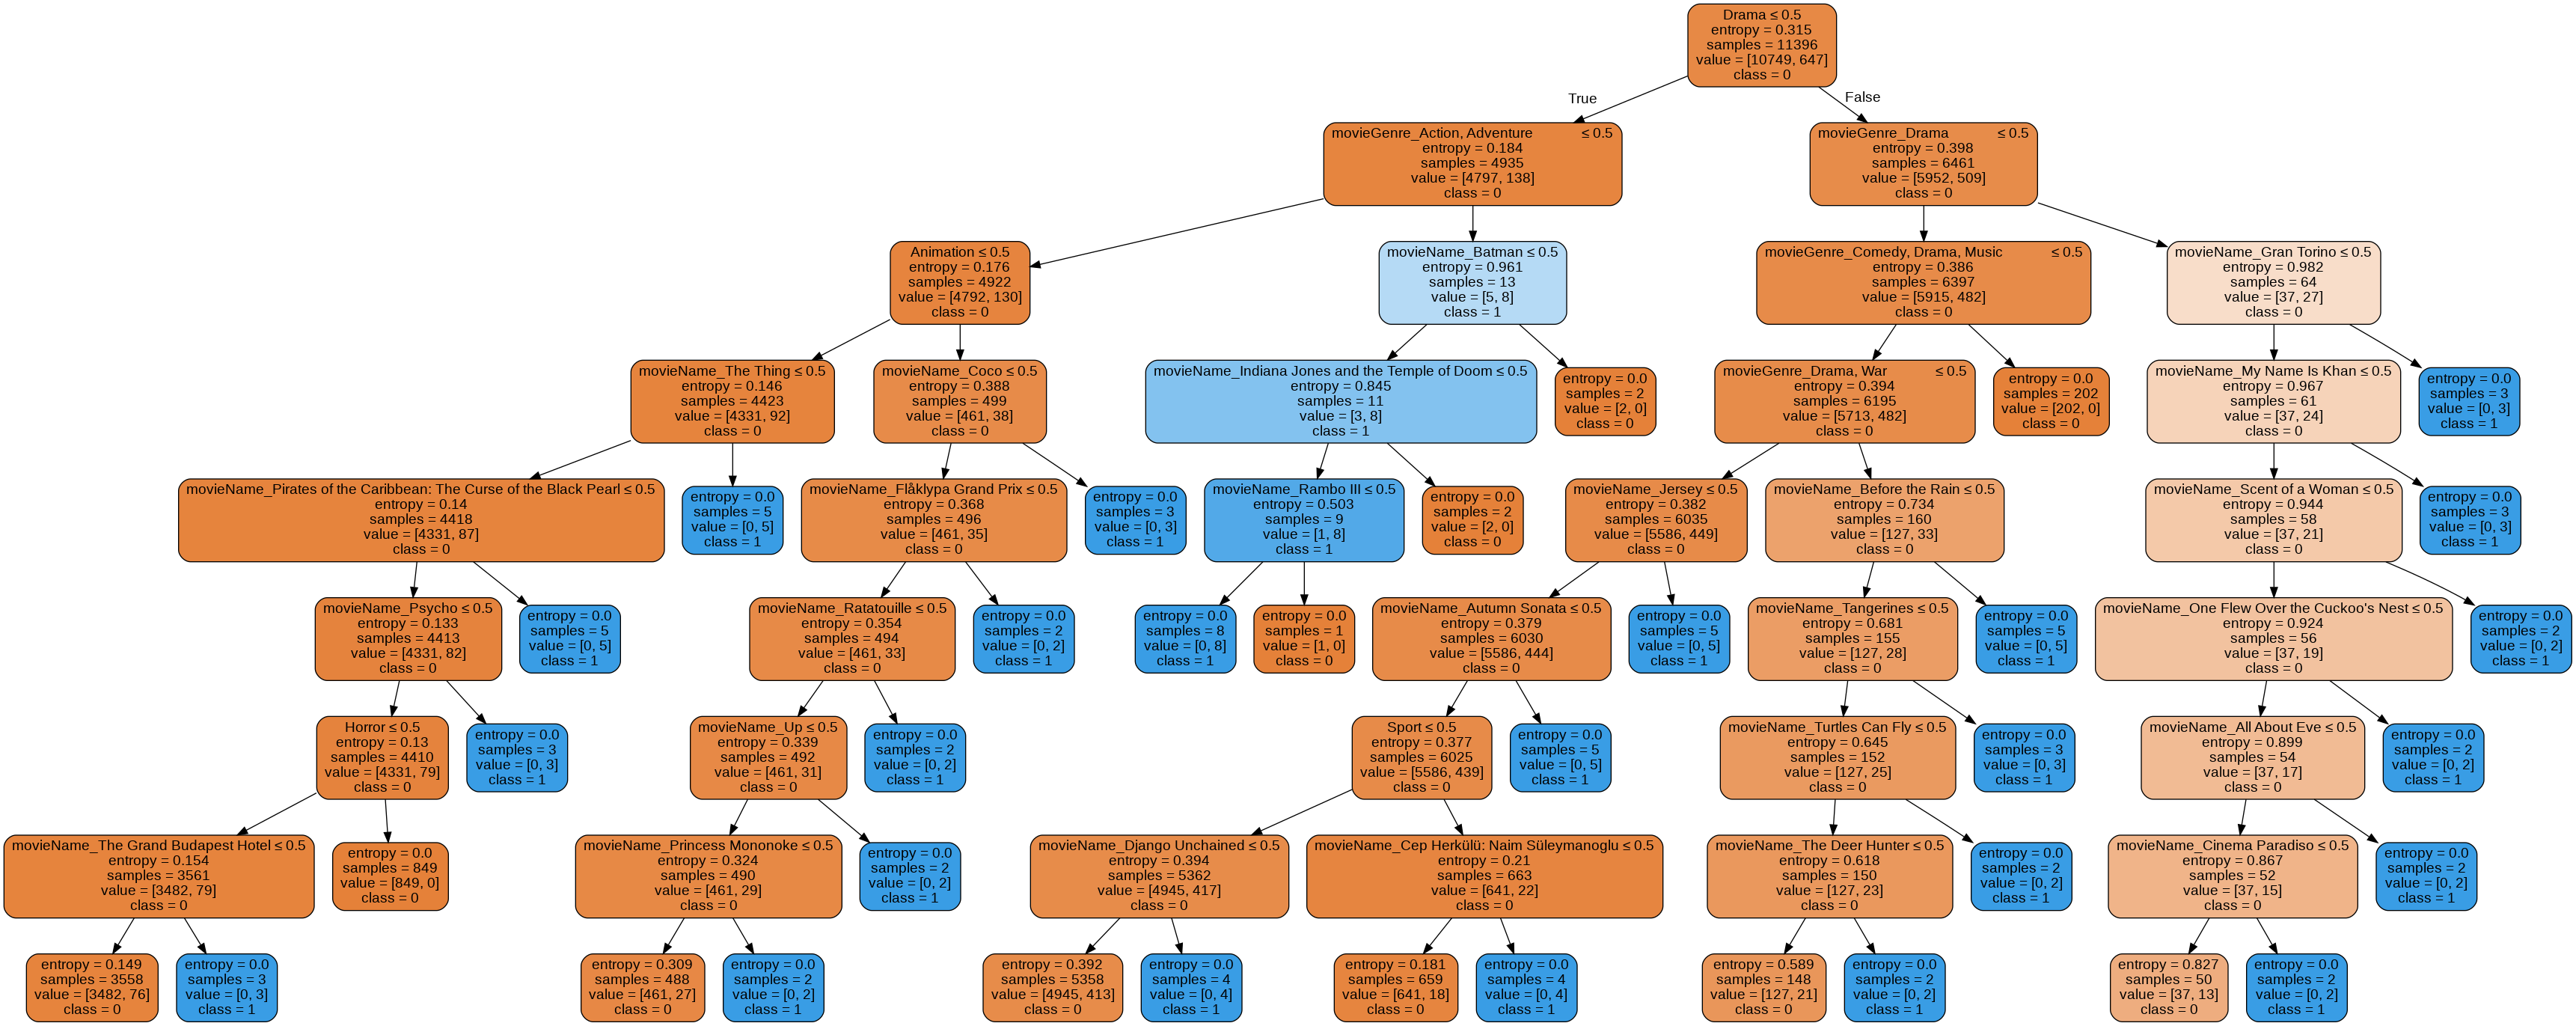

In [ ]:
# Run Classification tree with k-fold cross validation with k=5
# Placeholder variable: kfolds
kfolds = 5

# Here we specify within which range of depths we will search for the best pruned tree
maximum_depth = 10
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

# Display the resulting best pruned tree
Image(summary_tree(clf_BPT))

# To Read the leaf note on the classification tree refer the path below:
*Example of reading:* 
Leaf node ID = 2
(I copied the path from code below)

Path = ['Drama <= 0.5', 'movieGenre_Action, Adventure             <= 0.5', 'Animation <= 0.5', 'movieName_The Thing <= 0.5', 'movieName_Pirates of the Caribbean: The Curse of the Black Pearl <= 0.5', 'movieName_Psycho <= 0.5', 'Horror <= 0.5', 'movieName_To Be or Not to Be <= 0.5', 'movieName_The Grand Budapest Hotel > 0.5']
sample = 3
value = [0, 3]
class =  1


Translation of the leaf node:
Class = 1 represents the outcome: Overall review is greater than 8.0
Sample = 3 represents the number of movie viewers for this specific leaf node.

Therefore we can conclude that if a viewer that fall in the category:
*'Drama <= 0.5' 'movieGenre_Action, Adventure <= 0.5', 'Horror <= 0.5' 'Animation <= 0.5'*
There is 100 percent chance (3/3 = 1) they will all like and rate the movie names: The Thing, Pirates of the Caribbean: The Curse of the Black Pearl, Psycho , To Be or Not to Be all above 8 points overall rating. 
And they will specially like movieName: The Grand Budapest Hotel.

In [ ]:
# Function for getting the tree path

import numpy as np
def get_treepaths(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        try:
            prevnode = tree[2].index(node)           
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            # failed, so find it as a right node - if this also causes an exception, something's really f'd up
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        # now let's get the rule that caused prevnode to -> node
        p1 = df.columns[tree[0][prevnode]]    
        p2 = tree[1][prevnode]    
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        # if we've not yet reached the top, go up the tree one more step
        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    # get the nodes which are leaves
    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    # build a simpler tree as a nested list: [split feature, split threshold, left node, right node]
    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    # get the decision rules for each leaf node & apply them
    for (ind,nod) in enumerate(leaves):

        # get the decision rules
        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])      
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)

    for i in range(len(rules_list)):
      
      print('\nLeaf node ID =', i+1)
      print('Path =', rules_list[i])
      distro = sum(values_path[i][-1])
      print('sample =', int(sum(distro)))
      print('value =', list([int(distro[0]), int(distro[1])]))
      predicted_class = 1 if distro[1] > distro[0] else 0
      print('class = ', predicted_class)
      
    return None

get_treepaths(dtc=clf_BPT, df=df_nontestData)


Leaf node ID = 1
Path = ['Drama <= 0.5', 'movieGenre_Action, Adventure             <= 0.5', 'Animation <= 0.5', 'movieName_The Thing <= 0.5', 'movieName_Pirates of the Caribbean: The Curse of the Black Pearl <= 0.5', 'movieName_Psycho <= 0.5', 'Horror <= 0.5', 'movieName_The Grand Budapest Hotel <= 0.5']
sample = 3558
value = [3482, 76]
class =  0

Leaf node ID = 2
Path = ['Drama <= 0.5', 'movieGenre_Action, Adventure             <= 0.5', 'Animation <= 0.5', 'movieName_The Thing <= 0.5', 'movieName_Pirates of the Caribbean: The Curse of the Black Pearl <= 0.5', 'movieName_Psycho <= 0.5', 'Horror <= 0.5', 'movieName_The Grand Budapest Hotel > 0.5']
sample = 3
value = [0, 3]
class =  1

Leaf node ID = 3
Path = ['Drama <= 0.5', 'movieGenre_Action, Adventure             <= 0.5', 'Animation <= 0.5', 'movieName_The Thing <= 0.5', 'movieName_Pirates of the Caribbean: The Curse of the Black Pearl <= 0.5', 'movieName_Psycho <= 0.5', 'Horror > 0.5']
sample = 849
value = [849, 0]
class =  0

Lea